In [1]:
%matplotlib widget  

In [2]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib.animation import FuncAnimation
import numpy as np
import ipywidgets as ipyw

In [3]:
con = sql.connect("overall_data.db")   
cur = con.cursor()  

def getdata_country(year, things_to_get): 
    things = ', '.join(things_to_get)
    Query=f"SELECT {things} FROM newdata WHERE Year='{year}'"
    cur.execute(Query)
    data= cur.fetchall()   
    return np.array(data).T  


In [4]:
data = getdata_country(2020, ['Country', 'fossil_fuels' ,'population', 'gdp'])
newdata1= data[1].astype(float)
newdata2= data[2].astype(float)
newdata3= data[3].astype(float)

interactive(children=(FloatSlider(value=1970.0, description='Year', max=2020.0, min=1970.0, step=1.0), Output(…

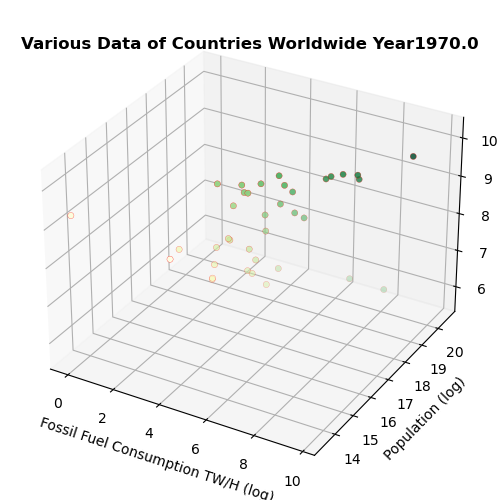

In [16]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(projection='3d')

line = (np.log(newdata2), np.log(newdata1), np.divide((newdata3),(newdata2))) 

    
def update(Year): 
    ax1.clear()
    data = getdata_country(Year, ['Country', 'fossil_fuels', 'population', 'gdp'])
    newdata1= data[1].astype(float)
    newdata2= data[2].astype(float)
    newdata3= data[3].astype(float)
    
    
    ax1.scatter(np.log(newdata1), np.log(newdata2), np.log(np.divide(newdata3, newdata2)), c=np.log(newdata3), cmap='YlGn', linewidth=0.2, edgecolor='red')
        
    ax1.set_xlabel('Fossil Fuel Consumption TW/H (log)')
    ax1.set_ylabel('Population (log)')
    ax1.set_zlabel('GDP per capita (log)')
    plt.tight_layout()
    plt.title(f'Various Data of Countries Worldwide Year{Year}', weight='bold', y=.99)
    fig1.canvas.draw()
       
FloatSlider = ipyw.widgets.FloatSlider(min=1970, max=2020, step=1, value=1970)

ipyw.interact(update, Year=FloatSlider);

